In [0]:
from torchvision.models import *
from fastai import *
from fastai.vision import *
from fastai.vision import image as im
from fastai.vision.models import *
from fastai.vision.learner import model_meta
import fastai
import torch

In [0]:
!unzip data.zip

In [0]:
train_directory = './data/'
os.listdir(train_directory)

['none', 'scissor', 'paper', 'rock']

In [0]:
data = ImageDataBunch.from_folder(
    train_directory,
    classes=['none', 'scissor', 'paper', 'rock'],valid_pct=0.3,seed=42,size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
none,none,none,none,none
Path: data;

Valid: LabelList (600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rock,none,paper,scissor,paper
Path: data;

Test: None

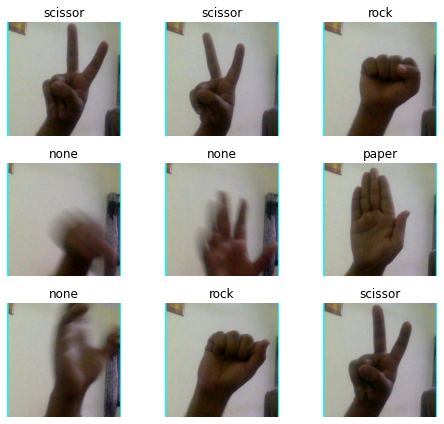

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
learn_1 = cnn_learner(data, models.resnet50,pretrained=True, metrics = [error_rate,accuracy],callback_fns=[
                         ShowGraph,
                         partial(callbacks.tracker.EarlyStoppingCallback, monitor='accuracy', mode='max', min_delta=1e-4, patience=3),
                         partial(callbacks.tracker.SaveModelCallback, monitor='accuracy', mode='max',name='bestmodel')
])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.279907,0.000362,0.000000,1.000000,00:19
1,0.110901,0.000010,0.000000,1.000000,00:16
2,0.057684,0.000018,0.000000,1.000000,00:16
3,0.033471,0.000025,0.000000,1.000000,00:16


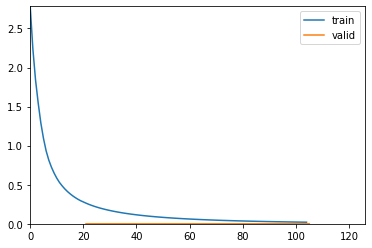

Better model found at epoch 0 with accuracy value: 1.0.
Epoch 4: early stopping


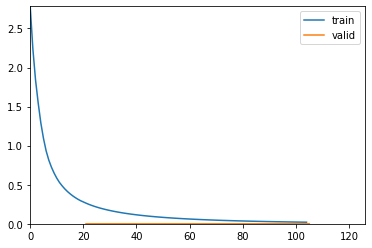

In [0]:
learn_1.fit_one_cycle(6)

In [0]:
img = im.open_image(train_directory+'paper/frame100.jpg')

In [0]:
print(type(img))

<class 'fastai.vision.image.Image'>


In [0]:
a=learn_1.predict(img)[0]

In [0]:
learn_1.save('bestmodel')


In [0]:
learn_1.export('mymodel.pkl')

In [0]:
new = load_learner(train_directory,'./mymodel.pkl')

In [0]:
new.predict(img)

NameError: ignored